<h1>Cardio Vascular disease prediction

<h2>Import models and files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

<h3>Data collection and processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data=pd.read_csv('heart.csv')

In [4]:
#print 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#print last 5 rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#number of rows and columns in dataset
heart_data.shape

(303, 14)

In [7]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#stastical methods about data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of target variable
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<h3>feature target

In [12]:
X=heart_data.drop(columns="target",axis=1)
y=heart_data["target"]

In [13]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [15]:
X.size

3939

<h2>model training

In [16]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler().fit(X)
X_std=std.transform(X)

<h2>Logistic regression model

<h3>splitting data into training and test dataset

In [19]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std,y,random_state=10,test_size=0.3,shuffle=True)


In [20]:
LR = LogisticRegression(solver="liblinear")


In [21]:
#training the model using training data
LR.fit(X_train_std,y_train)

LogisticRegression(solver='liblinear')

<h2>model evaluation

In [22]:
#accuracy score
#accuracy on training data
X_train_prediction=LR.predict(X_train_std)
trainig_data_accuracy= accuracy_score(X_train_prediction,y_train)


In [23]:
print("Accuracy On Training Data : ", trainig_data_accuracy*100)

Accuracy On Training Data :  85.37735849056604


In [24]:
#accuracy on testing data
X_test_prediction=LR.predict(X_test_std)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)


In [25]:
print("Accuracy On Testing Data : ", testing_data_accuracy*100)

Accuracy On Testing Data :  76.92307692307693


<h3>checking accuracy on confusion matrix



In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_train_prediction,y_train, labels=[0, 1])

print(cm)

[[ 68  11]
 [ 20 113]]


Text(0.5, 1.0, 'Confusion Matrix')

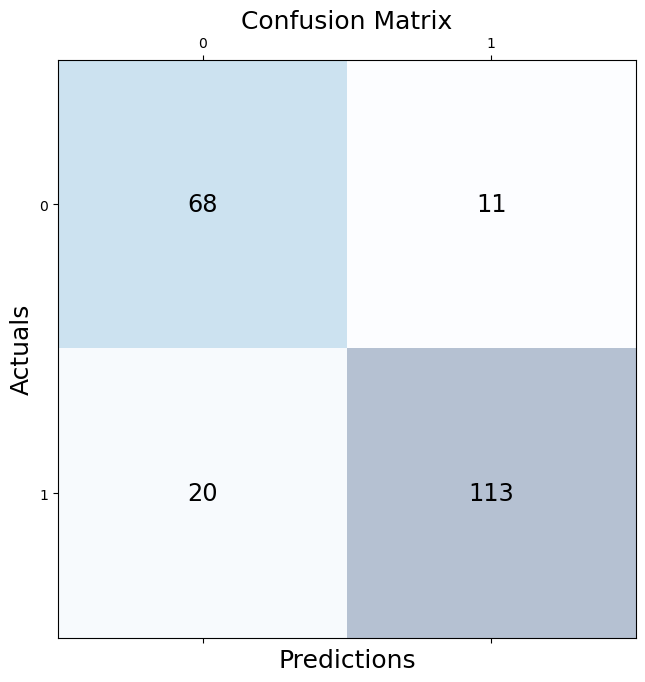

In [29]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [30]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction), list(y_train), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 113
True Negative 68
False Positive 11
False Negative 20


In [31]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc*100)

Accuracy On Training Data :  85.37735849056604


In [32]:
tn, fp, fn, tp = confusion_matrix(list(X_test_prediction), list(y_test), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 37
True Negative 33
False Positive 4
False Negative 17


In [33]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Testing Data : ',acc*100)

Accuracy On Testing Data :  76.92307692307693


In [34]:
#Sensitivity Score
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 68.51851851851852


In [35]:
#Specificity value
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 89.1891891891892


In [36]:
#positive predictive value
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 90.2439024390244


In [37]:
#negative predictive value
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 66.0


<h1>Multinomial Naive Bayes Model

In [38]:
#Splitting the value
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=3)

In [39]:
NB=MultinomialNB()

In [40]:
NB.fit(X_train,y_train)

MultinomialNB()

<h2>Modal Evaluation

In [42]:
X_train_prediction=NB.predict(X_train)
trainig_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [43]:
print("Accuracy On Training Data : ", trainig_data_accuracy*100)

Accuracy On Training Data :  75.20661157024794


In [44]:
X_test_prediction=NB.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [45]:
print("Accuracy On Testing Data : ", testing_data_accuracy*100)

Accuracy On Testing Data :  73.77049180327869


In [46]:
#checking using confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_train_prediction,y_train, labels=[0, 1])

print(cm)

[[ 78  28]
 [ 32 104]]


Text(0.5, 1.0, 'Confusion Matrix')

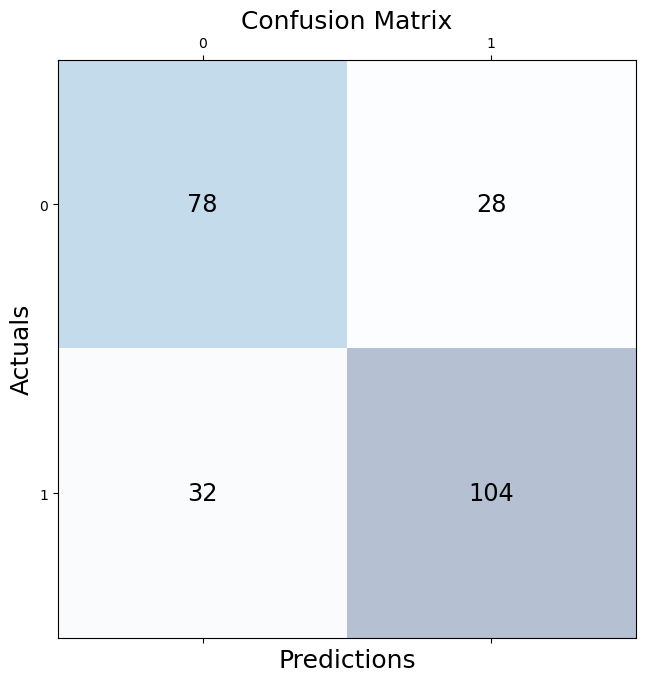

In [48]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [49]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction), list(y_train), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 104
True Negative 78
False Positive 28
False Negative 32


In [50]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc)

Accuracy On Training Data :  0.7520661157024794


In [51]:
tn, fp, fn, tp = confusion_matrix(list(X_test_prediction), list(y_test), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 24
True Negative 21
False Positive 9
False Negative 7


In [52]:
acc = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Testing Data : ',acc*100)

Accuracy On Testing Data :  73.77049180327869


In [53]:
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 77.41935483870968


In [54]:
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 70.0


In [55]:
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 72.72727272727273


In [56]:
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 75.0


<h1>Artifical Neural Network Model

<h2>splitting into test and train data set

In [58]:
X_train_std_nn,X_test_std_nn,y_train_nn,y_test_nn=train_test_split(X_std,y,random_state=10,test_size=0.3,shuffle="True")

In [59]:
nn_model = MLPClassifier()

In [60]:
#training of the model using training data
nn_model.fit(X_train_std_nn,y_train_nn)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [61]:
#Accuracy on training data

X_train_prediction_nn=nn_model.predict(X_train_std_nn)
training_data_accuracy_nn= accuracy_score(X_train_prediction_nn,y_train_nn)

print("Accuracy on Training Data :",training_data_accuracy_nn*100)

Accuracy on Training Data : 90.09433962264151


In [62]:
#Accuracy on testing data
X_test_prediction_nn=nn_model.predict(X_test_std_nn)
testing_data_accuracy_nn=accuracy_score(X_test_prediction_nn,y_test_nn)
print("Accuracy on Testing data", testing_data_accuracy_nn*100)

Accuracy on Testing data 79.12087912087912


In [63]:
from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(X_train_prediction_nn,y_train_nn, labels=[0, 1])

print(cm_nn)

[[ 74   7]
 [ 14 117]]


Text(0.5, 1.0, 'Confusion Matrix')

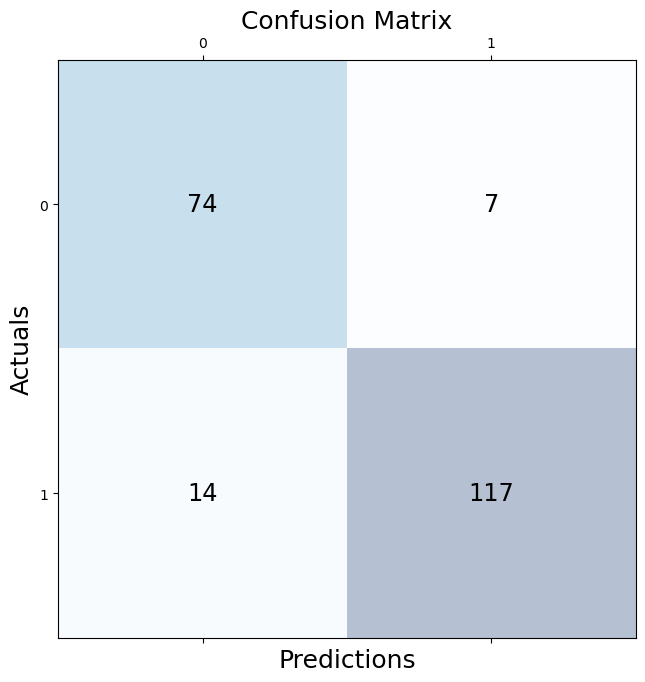

In [64]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_nn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_nn.shape[0]):
    for j in range(cm_nn.shape[1]):
        ax.text(x=j, y=i,s=cm_nn[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [65]:
tn, fp, fn, tp = confusion_matrix(list(X_train_prediction_nn), list(y_train_nn), labels=[0, 1]).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 117
True Negative 74
False Positive 7
False Negative 14


In [66]:
acc_nn = (tp+tn) / (tp+tn+fn+fp)

print('Accuracy On Training Data : ',acc*100)


Accuracy On Training Data :  73.77049180327869


In [67]:
#Sensitivity Score
sen = (tp)/(tp+fn)
print('Sensitivity Score is :',sen*100)

Sensitivity Score is : 89.31297709923665


In [68]:
#Specificity score
spe = (tn)/(tn+fp)
print('Specificity Score is :',spe*100)

Specificity Score is : 91.35802469135803


In [69]:
#Positive Predictive value
ppv = (tp)/(tp+fp)
print('Positive Predictive Value is :',ppv*100)

Positive Predictive Value is : 94.35483870967742


In [70]:
#Negative Predictive Value
npv =(tn)/(tn+fn)
print('Negative Predictive Value is :',npv*100)

Negative Predictive Value is : 84.0909090909091


<h1>Input Data to predict risk

In [75]:
input_data=(21,1,1,130,210,0,0,200,0,1.8,2,0,0)

#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction1=LR.predict(input_data_reshaped)
print("Using Linear Regression Model")
print(prediction1)
if (prediction1[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()
prediction2=NB.predict(input_data_reshaped)
print("Using Multinomial Naive Bayes Model")
print(prediction2)
if (prediction2[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease') 
  print()

prediction3=nn_model.predict(input_data_reshaped)
print("Using Artificial Neural Network Model")
print(prediction3)
if (prediction3[0]==0):
  print('The person does not have Heart Disease')
  print()
else:
  print('The person has Heart Disease')
  print()

final_verdict=int(prediction1+prediction2+prediction3)
if final_verdict>=3:
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
     print('***FINAL VERDICT: The person has Heart Disease***')
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
else:
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
     print('***FINAL VERDICT: The person does not have Heart Disease***')
     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


Using Linear Regression Model
[1]
The person has Heart Disease

Using Multinomial Naive Bayes Model
[1]
The person has Heart Disease

Using Artificial Neural Network Model
[1]
The person has Heart Disease

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
***FINAL VERDICT: The person has Heart Disease***
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
